## Pranav Redij
## BE CMPN A
## 21102A0005

# Graph-Based Clustering with Spectral Clustering

## Step 1: Load the Dataset

In [1]:
import pandas as pd
import networkx as nx
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load the Facebook Social Network Dataset
facebook_url = 'https://snap.stanford.edu/data/facebook_combined.txt.gz'
facebook_data = pd.read_csv(facebook_url, sep=' ', header=None, names=['Source', 'Target'])
facebook_data.head()

,Source,Target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [12]:
facebook_data.shape

(88234, 2)

## Step 2: Create Similarity Graph (Adjacency Matrix)

In [3]:
# Create graph using networkx
G = nx.from_pandas_edgelist(facebook_data, 'Source', 'Target')



In [6]:
# Create adjacency matrix
adj_matrix = nx.to_numpy_array(G)


## Step 3: Apply Spectral Clustering

In [7]:
# Apply Spectral Clustering
n_clusters = 5  # Number of clusters to find
spectral_model = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
labels = spectral_model.fit_predict(adj_matrix)
labels[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

## Step 4: Evaluate the Clustering Performance

In [8]:
# Evaluate the clustering using Silhouette Score
silhouette_avg = silhouette_score(adj_matrix, labels, metric='euclidean')

# Evaluate using Davies-Bouldin Index
db_score = davies_bouldin_score(adj_matrix, labels)

silhouette_avg, db_score

(-0.10942618077445408, 4.037894575651196)

## Step 5: Visualize the Clusters

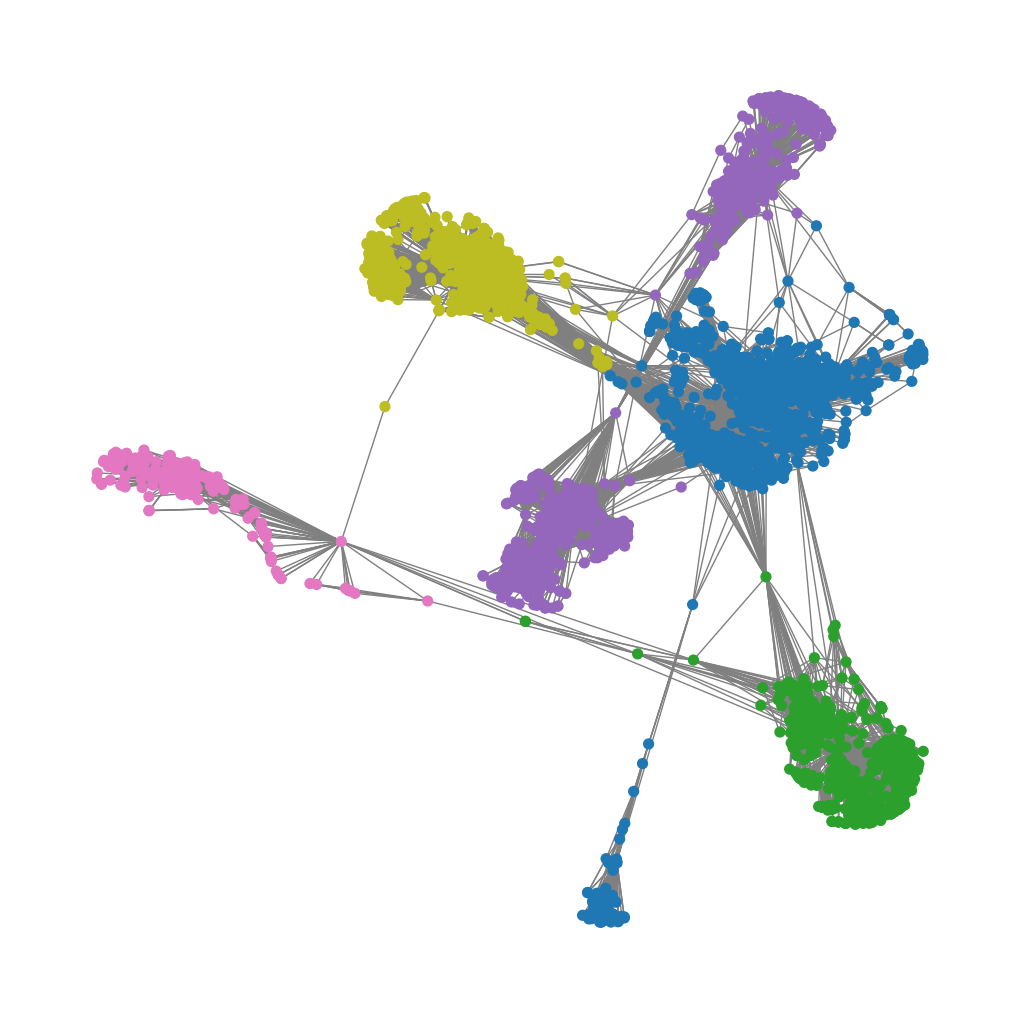

In [9]:
# Plot the graph with clusters
plt.figure(figsize=(10, 10))
color_map = {i: plt.cm.tab10(i / n_clusters) for i in range(n_clusters)}

node_colors = [color_map[labels[i]] for i in range(len(labels))]
nx.draw(G, node_color=node_colors, node_size=50, edge_color='gray', with_labels=False)
plt.show()

## Step 6: Analyze and Interpret Clusters

In [11]:
# Analyze the clusters
import numpy as np
unique, counts = np.unique(labels, return_counts=True)

# Display the size of each cluster
cluster_sizes = dict(zip(unique, counts))
cluster_sizes

{0: 1406, 1: 548, 2: 1094, 3: 205, 4: 786}